In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType
from pyspark.sql.functions import *

In [ ]:
dbutils.fs.ls("/FileStore/tables/")

[FileInfo(path='dbfs:/FileStore/tables/multicsvfile/', name='multicsvfile/', size=0, modificationTime=1701320476000)]

In [ ]:
dataframe = spark.read.load('/user/hive/warehouse/googleplaystore', sep=',', header='true', escape='"', inferschema='true')

In [ ]:
dataframe.count()

10841

In [ ]:
dataframe.show(1)

+--------------------+--------------+------+-------+----+--------+----+-----+--------------+------------+---------------+-----------+------------+
|                 App|      Category|Rating|Reviews|Size|Installs|Type|Price|Content Rating|      Genres|   Last Updated|Current Ver| Android Ver|
+--------------------+--------------+------+-------+----+--------+----+-----+--------------+------------+---------------+-----------+------------+
|Photo Editor & Ca...|ART_AND_DESIGN|   4.1|    159| 19M| 10,000+|Free|    0|      Everyone|Art & Design|January 7, 2018|      1.0.0|4.0.3 and up|
+--------------------+--------------+------+-------+----+--------+----+-----+--------------+------------+---------------+-----------+------------+
only showing top 1 row



In [ ]:
dataframe.printSchema()

root
 |-- App: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Rating: double (nullable = true)
 |-- Reviews: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- Installs: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Price: string (nullable = true)
 |-- Content Rating: string (nullable = true)
 |-- Genres: string (nullable = true)
 |-- Last Updated: string (nullable = true)
 |-- Current Ver: string (nullable = true)
 |-- Android Ver: string (nullable = true)



In [ ]:
dataframe = dataframe.drop("size", "Content Rating", "Last Updated", "Android Ver","Current Ver")

In [ ]:
dataframe.show(2)

+--------------------+--------------+------+-------+--------+----+-----+--------------------+
|                 App|      Category|Rating|Reviews|Installs|Type|Price|              Genres|
+--------------------+--------------+------+-------+--------+----+-----+--------------------+
|Photo Editor & Ca...|ART_AND_DESIGN|   4.1|    159| 10,000+|Free|    0|        Art & Design|
| Coloring book moana|ART_AND_DESIGN|   3.9|    967|500,000+|Free|    0|Art & Design;Pret...|
+--------------------+--------------+------+-------+--------+----+-----+--------------------+
only showing top 2 rows



In [ ]:
# Use regexp_replace to convert strigs to integers
from pyspark.sql.functions import regexp_replace, col

# Change Review type (String to Integer)
# Remove "+" from Installs
# Convert Installs to Integer
# Remove the "$" from price
# Cast Price (String to Integer)

dataframe = dataframe.withColumn("Reviews",col("Reviews").cast(IntegerType()))\
    .withColumn("Installs",regexp_replace(col("Installs"),"[^0-9]",""))\
    .withColumn("Installs",col("Installs").cast(IntegerType()))\
        .withColumn("Price",regexp_replace(col("Price"),"[$]",""))\
        .withColumn("Price",col("Price").cast(IntegerType()))\
            .withColumn("Rating",col("Rating").cast(IntegerType()))

In [ ]:
# One can use any name they like (I prefer play_apps as Google Play Store apps are in consideration)
dataframe.createOrReplaceTempView("play_apps")

In [ ]:
%sql select * from play_apps

App Category Rating Reviews Installs Type Price Genres Photo Editor & Candy Camera & Grid & ScrapBook ART_AND_DESIGN 4 159 10000 Free 0 Art & Design Coloring book moana ART_AND_DESIGN 3 967 500000 Free 0 Art & Design;Pretend Play U Launcher Lite – FREE Live Cool Themes, Hide Apps ART_AND_DESIGN 4 87510 5000000 Free 0 Art & Design Sketch - Draw & Paint ART_AND_DESIGN 4 215644 50000000 Free 0 Art & Design Pixel Draw - Number Art Coloring Book ART_AND_DESIGN 4 967 100000 Free 0 Art & Design;Creativity Paper flowers instructions ART_AND_DESIGN 4 167 50000 Free 0 Art & Design Smoke Effect Photo Maker - Smoke Editor ART_AND_DESIGN 3 178 50000 Free 0 Art & Design Infinite Painter ART_AND_DESIGN 4 36815 1000000 Free 0 Art & Design Garden Coloring Book ART_AND_DESIGN 4 13791 1000000 Free 0 Art & Design Kids Paint Free - Drawing Fun ART_AND_DESIGN 4 121 10000 Free 0 Art & Design;Creativity Text on Photo - Fonteee ART_AND_DESIGN 4 13880 1000000 Free 0 Art & Design Name Art Photo Editor - Focus n Filters ART_AND_DESIGN 4 8788 1000000 Free 0 Art & Design Tattoo Name On My Photo Editor ART_AND_DESIGN 4 44829 10000000 Free 0 Art & Design Mandala Coloring Book ART_AND_DESIGN 4 4326 100000 Free 0 Art & Design 3D Color Pixel by Number - Sandbox Art Coloring ART_AND_DESIGN 4 1518 100000 Free 0 Art & Design Learn To Draw Kawaii Characters ART_AND_DESIGN 3 55 5000 Free 0 Art & Design Photo Designer - Write your name with shapes ART_AND_DESIGN 4 3632 500000 Free 0 Art & Design 350 Diy Room Decor Ideas ART_AND_DESIGN 4 27 10000 Free 0 Art & Design FlipaClip - Cartoon animation ART_AND_DESIGN 4 194216 5000000 Free 0 Art & Design ibis Paint X ART_AND_DESIGN 4 224399 10000000 Free 0 Art & Design Logo Maker - Small Business ART_AND_DESIGN 4 450 100000 Free 0 Art & Design Boys Photo Editor - Six Pack & Men's Suit ART_AND_DESIGN 4 654 100000 Free 0 Art & Design Superheroes Wallpapers | 4K Backgrounds ART_AND_DESIGN 4 7699 500000 Free 0 Art & Design Mcqueen Coloring pages ART_AND_DESIGN 0 61 100000 Free 0 Art & Design;Action & Adventure HD Mickey Minnie Wallpapers ART_AND_DESIGN 4 118 50000 Free 0 Art & Design Harley Quinn wallpapers HD ART_AND_DESIGN 4 192 10000 Free 0 Art & Design Colorfit - Drawing & Coloring ART_AND_DESIGN 4 20260 500000 Free 0 Art & Design;Creativity Animated Photo Editor ART_AND_DESIGN 4 203 100000 Free 0 Art & Design Pencil Sketch Drawing ART_AND_DESIGN 3 136 10000 Free 0 Art & Design Easy Realistic Drawing Tutorial ART_AND_DESIGN 4 223 100000 Free 0 Art & Design Pink Silver Bow Keyboard Theme ART_AND_DESIGN 4 1120 100000 Free 0 Art & Design Art Drawing Ideas ART_AND_DESIGN 4 227 50000 Free 0 Art & Design Anime Manga Coloring Book ART_AND_DESIGN 4 5035 100000 Free 0 Art & Design Easy Origami Ideas ART_AND_DESIGN 4 1015 100000 Free 0 Art & Design I Creative Idea ART_AND_DESIGN 4 353 10000 Free 0 Art & Design How to draw Ladybug and Cat Noir ART_AND_DESIGN 3 564 100000 Free 0 Art & Design UNICORN - Color By Number & Pixel Art Coloring ART_AND_DESIGN 4 8145 500000 Free 0 Art & Design;Creativity Floor Plan Creator ART_AND_DESIGN 4 36639 5000000 Free 0 Art & Design PIP Camera - PIP Collage Maker ART_AND_DESIGN 4 158 10000 Free 0 Art & Design How To Color Disney Princess - Coloring Pages ART_AND_DESIGN 4 591 500000 Free 0 Art & Design Drawing Clothes Fashion Ideas ART_AND_DESIGN 4 117 10000 Free 0 Art & Design Sad Poetry Photo Frames 2018 ART_AND_DESIGN 4 176 100000 Free 0 Art & Design Textgram - write on photos ART_AND_DESIGN 4 295221 10000000 Free 0 Art & Design Paint Splash! ART_AND_DESIGN 3 2206 100000 Free 0 Art & Design;Creativity Popsicle Sticks and Similar DIY Craft Ideas ART_AND_DESIGN 4 26 10000 Free 0 Art & Design Canva: Poster, banner, card maker & graphic design ART_AND_DESIGN 4 174531 10000000 Free 0 Art & Design Install images with music to make video without Net - 2018 ART_AND_DESIGN 4 1070 100000 Free 0 Art & Design Little Teddy Bear Colouring Book Game ART_AND_DESIGN 4 85 100000 Free 0 Art & Design How To Draw Food ART_A

In [ ]:
%sql select App, sum(Reviews) from play_apps
group by 1
order by 2 desc

App sum(Reviews) Instagram 266241989 WhatsApp Messenger 207348304 Clash of Clans 179558781 Messenger – Text and Video Chat for Free 169932272 Subway Surfers 166331958 Candy Crush Saga 156993136 Facebook 156286514 8 Ball Pool 99386198 Clash Royale 92530298 Snapchat 68045010 Viber Messenger 56675481 UC Browser - Fast Download Private & Secure 53140694 YouTube 51278853 Temple Run 2 48710930 Sniper 3D Gun Shooter: Free Shooting Games - FPS 46022233 My Talking Tom 44668928 Duolingo: Learn Languages Free 44047832 Google Photos 43423827 Clean Master- Space Cleaner & Antivirus 42916526 Pou 41939801 Minion Rush: Despicable Me Official Game 40865394 ROBLOX 40038379 My Talking Angela 39523473 Farm Heroes Saga 38072869 Hill Climb Racing 35692703 Twitter 34992778 LINE: Free Calls & Messages 32370670 Skype - free IM & video calls 31452507 slither.io 31405938 Wish - Shopping Made Fun 31045896 Dream League Soccer 2018 29639915 Google Chrome: Fast & Secure 28928148 Angry Birds Classic 27833127 Maps - Navigate & Explore 27702141 Netflix 27279720 ZEDGE™ Ringtones & Wallpapers 25859549 BBM - Free Calls & Messages 25686296 Cache Cleaner-DU Speed Booster (booster & cleaner) 25519478 Security Master - Antivirus, VPN, AppLock, Booster 24900999 Zombie Tsunami 24603575 AliExpress - Smarter Shopping, Better Living 23661715 Shadow Fight 2 21960912 Garena Free Fire 21952876 WeChat 21549856 Pokémon GO 20846209 Plants vs. Zombies FREE 20334139 MX Player 19418277 imo free video calls and chat 19143760 Candy Crush Soda Saga 18596538 Hungry Shark Evolution 18220503 Facebook Lite 17202223 360 Security - Free Antivirus, Booster, Cleaner 16771865 Score! Hero 16258027 ES File Explorer File Manager 16146751 Google 16055116 B612 - Beauty & Filter Camera 15842119 BeautyPlus - Easy Photo Editor & Selfie Camera 15788769 Truecaller: Caller ID, SMS spam blocking & Dialer 15640984 SHAREit - Transfer & Share 15565839 Opera Mini - fast web browser 15451126 PicsArt Photo Studio: Collage Maker & Pic Editor 15184658 Badoo - Free Chat & Dating App 15126777 PUBG MOBILE 14843378 Camera360: Selfie Photo Editor with Funny Sticker 14595332 Waze - GPS, Maps, Traffic Alerts & Live Navigation 14463646 Google Play Games 14334097 eBay: Buy & Sell this Summer - Discover Deals Now! 13944152 Gmail 13813131 Hangouts 13677659 DU Battery Saver - Battery Charger & Battery Life 13479633 CM Launcher 3D - Theme, Wallpapers, Efficient 13403623 Pinterest 12911818 Yahoo Mail – Stay Organized 12564485 Flipkart Online Shopping App 12016309 Google Translate 11486777 UC Browser Mini -Tiny Fast Private & Secure 10945365 Google Drive 10922534 Talking Tom Gold Run 10791088 Traffic Racer 10775420 Angry Birds Rio 10442156 Candy Camera - selfie, beauty camera, photo editor 10106000 Yes day 10055521 Hay Day 10053186 VivaVideo - Video Editor & Photo Movie 9879473 Uber 9850286 Cymera Camera- Photo Editor, Filter,Collage,Layout 9672593 Google+ 9659497 Telegram 9385370 Calorie Counter - MyFitnessPal 9367602 Jetpack Joyride 9275602 Firefox Browser fast & private 9225242 Bowmasters 9213426 Castle Clash: Heroes of the Empire US 9157366 Adobe Acrobat Reader 9047150 Helix Jump 8982809 Tumblr 8864537 Crossy Road 8460863 Asphalt 8: Airborne 8389714 Gardenscapes 8258397 Mobile Legends: Bang Bang 8219586 Battery Doctor-Battery Life Saver & Battery Cooler 8190074 Piano Tiles 2™ 8118880 Angry Birds 2 7765341 KakaoTalk: Free Calls & Text 7639603 Agar.io 7632413 Tango - Live Video Broadcast 7613338 Sonic Dash 7556743 PhotoGrid: Video & Pic Collage Maker, Photo Editor 7529865 GO Launcher - 3D parallax Themes & HD Wallpapers 7464996 Opera Browser: Fast and Secure 7420997 YouCam Makeup - Magic Selfie Makeovers 6675908 Microsoft Outlook 6502414 Flow Free 6477706 Fishdom 6474440 Trivia Crack 6427773 Cooking Fever 6396041 Cut the Rope FULL FREE 6369879 MeetMe: Chat & Meet New People 6299254 Microsoft Word 6246995 AVG AntiVirus 2018 for Android Security 6207063 Homescapes 6187290 Geometry Dash Lite 6181640 CM Locker - Security Lockscr

In [ ]:
%sql select App, sum(Installs) from play_apps
group by 1
order by 2 desc

App sum(Installs) Subway Surfers 6000000000 Google Drive 4000000000 Google News 4000000000 Hangouts 4000000000 Instagram 4000000000 Google Photos 4000000000 Candy Crush Saga 3500000000 Messenger – Text and Video Chat for Free 3000000000 Skype - free IM & video calls 3000000000 Google Chrome: Fast & Secure 3000000000 Maps - Navigate & Explore 3000000000 WhatsApp Messenger 3000000000 Temple Run 2 3000000000 Gmail 3000000000 Viber Messenger 2500000000 Google Play Games 2000000000 Google 2000000000 Facebook 2000000000 Pou 2000000000 Snapchat 2000000000 YouTube 2000000000 Google+ 2000000000 imo free video calls and chat 2000000000 Google Street View 2000000000 Dropbox 1500000000 LINE: Free Calls & Messages 1500000000 Gboard - the Google Keyboard 1500000000 Twitter 1500000000 Flipboard: News For Our Time 1500000000 Google Calendar 1500000000 My Talking Tom 1500000000 MX Player 1500000000 UC Browser - Fast Download Private & Secure 1500000000 Microsoft Word 1500000000 Google Play Books 1000000000 Google Translate 1000000000 Facebook Lite 1000000000 Google Duo - High Quality Video Calls 1000000000 Google Play Movies & TV 1000000000 SHAREit - Transfer & Share 1000000000 ROBLOX 900000000 Duolingo: Learn Languages Free 700000000 8 Ball Pool 700000000 Sniper 3D Gun Shooter: Free Shooting Games - FPS 600000000 slither.io 600000000 Helix Jump 600000000 Clean Master- Space Cleaner & Antivirus 500000000 BeautyPlus - Easy Photo Editor & Selfie Camera 500000000 eBay: Buy & Sell this Summer - Discover Deals Now! 500000000 Plants vs. Zombies FREE 500000000 Zombie Tsunami 500000000 Flow Free 500000000 Farm Heroes Saga 500000000 Samsung Health 500000000 Security Master - Antivirus, VPN, AppLock, Booster 500000000 Wish - Shopping Made Fun 500000000 Cloud Print 500000000 Netflix 500000000 TripAdvisor Hotels Flights Restaurants Attractions 500000000 Angry Birds Classic 500000000 WeChat 400000000 Talking Tom Gold Run 400000000 AliExpress - Smarter Shopping, Better Living 400000000 Cymera Camera- Photo Editor, Filter,Collage,Layout 400000000 Evernote – Organizer, Planner for Notes & Memos 400000000 Garena Free Fire 400000000 Google Keep 400000000 Clash Royale 400000000 Google Pay 400000000 Hill Climb Racing 400000000 Clash of Clans 400000000 Angry Birds Rio 400000000 My Talking Angela 400000000 Minion Rush: Despicable Me Official Game 400000000 Badoo - Free Chat & Dating App 400000000 ZEDGE™ Ringtones & Wallpapers 400000000 Firefox Browser fast & private 300000000 Candy Camera - selfie, beauty camera, photo editor 300000000 Yahoo Mail – Stay Organized 300000000 IMDb Movies & TV 300000000 YouCam Perfect - Selfie Photo Editor 300000000 Booking.com Travel Deals 300000000 Cut the Rope FULL FREE 300000000 Candy Crush Soda Saga 300000000 Dream League Soccer 2018 300000000 Opera Browser: Fast and Secure 300000000 Adobe Acrobat Reader 300000000 ES File Explorer File Manager 300000000 KakaoTalk: Free Calls & Text 300000000 Telegram 300000000 Camera360: Selfie Photo Editor with Funny Sticker 300000000 UC Browser Mini -Tiny Fast Private & Secure 300000000 Hungry Shark Evolution 300000000 Pinterest 300000000 Opera Mini - fast web browser 300000000 Microsoft OneNote 300000000 Google Docs 300000000 B612 - Beauty & Filter Camera 300000000 Amazon Shopping 300000000 Bowmasters 300000000 Tumblr 300000000 Score! Hero 300000000 MeetMe: Chat & Meet New People 250000000 Granny 250000000 Calorie Counter - MyFitnessPal 250000000 Microsoft Excel 200000000 Pokémon GO 200000000 Magic Tiles 3 200000000 Jetpack Joyride 200000000 Waze - GPS, Maps, Traffic Alerts & Live Navigation 200000000 Groupon - Shop Deals, Discounts & Coupons 200000000 YouTube Kids 200000000 CM Launcher 3D - Theme, Wallpapers, Efficient 200000000 Who 200000000 Motorola FM Radio 200000000 Talking Ben the Dog 200000000 Uber 200000000 Google Sheets 200000000 Truecaller: Caller ID, SMS spam blocking & Dialer 200000000 Backgrounds HD (Wallpapers) 200000000 Z Camera - Photo Editor, Beauty Selfie, Collage 200000000 Ph

In [ ]:
%sql select Category, sum(Installs) from play_apps
group by 1
order by 2 desc

Category sum(Installs) GAME 35086024415 COMMUNICATION 32647276251 PRODUCTIVITY 14176091369 SOCIAL 14069867902 TOOLS 11452771915 FAMILY 10258263505 PHOTOGRAPHY 10088247655 NEWS_AND_MAGAZINES 7496317760 TRAVEL_AND_LOCAL 6868887146 VIDEO_PLAYERS 6222002720 SHOPPING 3247848785 ENTERTAINMENT 2869160000 PERSONALIZATION 2325494782 BOOKS_AND_REFERENCE 1921469576 SPORTS 1751174498 HEALTH_AND_FITNESS 1583072512 BUSINESS 1001914865 FINANCE 876648734 EDUCATION 871452000 MAPS_AND_NAVIGATION 724281890 LIFESTYLE 537643539 WEATHER 426100520 FOOD_AND_DRINK 273898751 DATING 264310807 HOUSE_AND_HOME 168712461 ART_AND_DESIGN 124338100 LIBRARIES_AND_DEMO 62995910 COMICS 56086150 MEDICAL 53257437 AUTO_AND_VEHICLES 53130211 PARENTING 31521110 BEAUTY 27197050 EVENTS 15973161 1.9 null

In [ ]:
%sql select App, sum(Price) from play_apps
where Type='Paid'
group by 1
order by 2 desc

App sum(Price) I'm Rich - Trump Edition 400 I Am Rich Pro 399 I am Rich 399 I am Rich! 399 I am rich 399 most expensive app (H) 399 I am rich (Most expensive app) 399 I'm Rich/Eu sou Rico/أنا غني/我很有錢 399 💎 I'm rich 399 I am Rich Plus 399 I Am Rich Premium 399 I am rich(premium) 399 I AM RICH PRO PLUS 399 Eu Sou Rico 394 I Am Rich 389 I am extremely Rich 379 I am rich VIP 299 EP Cook Book 200 Vargo Anesthesia Mega App 158 cronometra-br 154 BP Fitness Lead Scanner 109 Lean EQ 89 Language Therapy: Aphasia 74 Human Anatomy Atlas 2018: Complete 3D Human Body 72 A Manual of Acupuncture 66 EMT PASS 58 PTA Content Master 58 Advanced Comprehension Therapy 48 Muscle Premium - Human Anatomy, Kinesiology, Bones 48 Dr.Dice - Sic bo analyzer 46 Norwegian For Kids & Babies F 39 LTC AS Legal 39 Hospitalist Handbook 38 I am Rich Person 37 2017 EMRA Antibiotic Guide 32 Eu sou Rico 30 Golfshot Plus: Golf GPS 29 AP Art History Flashcards 29 Guide to Nikon Df 29 Dz kayas 28 AnatomyMapp 28 Block Buddy 28 G-NetReport Pro 25 Cardiac diagnosis (heart rate, arrhythmia) 24 Essential Anatomy 3 22 EMT Review Plus 22 Paramedic Protocol Provider 20 AW Toolbox 19 USMLE Step 2 CK Flashcards 19 NewTek NDI 19 boattheory.ch Full 2018 19 DRAGON QUEST VIII 19 Z PIVOT 19 I am Rich Premium Plus 18 ASCCP Mobile 18 Diabetes & Diet Tracker 18 Monash Uni Low FODMAP Diet 18 The World Ends With You 17 SkyTest BU/GU Lite 17 Trine 2: Complete Story 16 Interactive CT and MRI Anatomy 15 Facetune - For Free 15 Navi Radiography Pro 15 Chess of Blades (BL/Yaoi Game) (No VA) 14 Electrician Calculator Pro 14 Number Therapy 14 DRAGON QUEST VI 14 Blackjack Verite Drills 14 DRAGON QUEST IV 14 DRAGON QUEST V 14 G-NetTrack Pro 14 Ak Parti Yardım Toplama 13 FINAL FANTASY DIMENSIONS 13 ZombieVital DG 12 Carrier Landings Pro 12 DS Helpdesk Plus 12 Minecraft 12 Journal Club: Medicine 12 BackCountry Navigator TOPO GPS PRO 11 Fuzzy Numbers: Pre-K Number Foundation 10 RPG ブレイジング ソウルズ アクセレイト 10 Medical ID - In Case of Emergency (ICE) 10 Pedi STAT 10 CCHT PREP 10 go41cx 10 Jeppesen CR Flight Computer 9 Critical Care Paramedic Review 9 InfantRisk Center HCP 9 Abdominal CT Sectional Walker 9 Star Wars ™: DIRTY 9 XCOM®: Enemy Within 9 Dr. Panda & Toto's Treehouse 9 Chest CT Sectional Walker 9 Vital Tones EI Pro 9 DRAGON QUEST III 9 Baldur's Gate II 9 EF Lens Simulator 9 FORD V SERIES CALC - NO LIMIT 9 Baldur's Gate: Enhanced Edition 9 Pocket AC 9 BIG Launcher 9 CHRONO TRIGGER (Upgrade Ver.) 9 500 AP World History Questions 9 Tiny Scanner Pro: PDF Doc Scan 8 Greater London A-Z 2016 8 Maps & GPS Navigation OsmAnd+ 8 MC.Fitting 8 TurboScan: scan documents and receipts in PDF 8 ACCDB MDB DB Manager Pro - Editor for MS Access 8 Football Manager Mobile 2018 8 DG Surveyor 8 USB BT Wi-Fi Color Terminal Modem 8 Police Field Interview FI Card 7 Children Educational Game Full 7 FINAL FANTASY V 7 Acupuncture Assistant 7 Backgammon NJ for Android 7 My Movies Pro - Movie & TV Collection Library 7 Recognise Foot 7 Fast Tract Diet 7 AMBW Dating App: Asian Men Black Women Interracial 7 Radiological Anatomy For FRCR1 6 Calculator 6 EMT Tutor NREMT-B Study Guide 6 The Legacy (Full) 6 The FN HP pistol explained 6 New York Mysteries (Full) 6 Ad Removal: thereisonlywe 6 FN pistol model 1903 explained 6 Grand Theft Auto: San Andreas 6 FN model 1900 pistol explained 6 Moco+ - Chat, Meet People 6 FN FAL rifle explained 6 Sago Mini Babies 6 Toca Life: City 6 Prime Key for Nougat Launcher& O Launcher &KitKat 6 Camera FV-5 6 Florida Tides & Weather 6 Call of Duty:Black Ops Zombies 6 The EO Bar 6 Please Don't Touch Anything 3D 5 Pistolet FN GP35 expliqué 5 OrthoFlow 5 Pistolet FN 1906 expliqué 5 The FN "Baby" pistol explained 5 OptoDrum 5 Pistolet CZ-70 CZ-50 expliqué 5 amm dz 5 FN pistol Model 1906 explained 5 Monitor My BP 5 CZ-Cyberon Voice Commander 5 CZ-45 pistol explained 5 BG Monitor Diabetes Pro 5 aCalendar+ Calendar & Tasks 5 CZ-38 (vz 38) pistol explained 5 BSPlayer 5 RollerCoaster Tycoon® Classic 5 G-NetWiFi Pro 5

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
data = spark.sql("SELECT Category, Rating FROM play_apps")

In [ ]:
indexer = StringIndexer(inputCol="Category", outputCol="CategoryIndex")

In [ ]:
assembler = VectorAssembler(inputCols=["CategoryIndex"], outputCol="features")

In [ ]:
lr = LogisticRegression(labelCol="Rating", featuresCol="features")

In [ ]:
pipeline_lr = Pipeline(stages=[indexer, assembler, lr])

In [ ]:
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

In [ ]:
model_lr = pipeline_lr.fit(train_data)

In [ ]:
predictions_lr = model_lr.transform(test_data)

In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol="Rating", predictionCol="prediction", metricName="accuracy")
accuracy_lr = evaluator.evaluate(predictions_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr}")

Decision Tree Accuracy: 0.6680972818311874
Logistic Regression Accuracy: 0.6680972818311874


In [ ]:
def plot_histogram(predictions, title):
    actual_labels = predictions.select("Rating").rdd.flatMap(lambda x: x).collect()
    predicted_labels = predictions.select("prediction").rdd.flatMap(lambda x: x).collect()

    plt.hist([actual_labels, predicted_labels], bins='auto', alpha=0.7, label=['Actual', 'Predicted'])
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.legend(loc='upper right')
    plt.show()

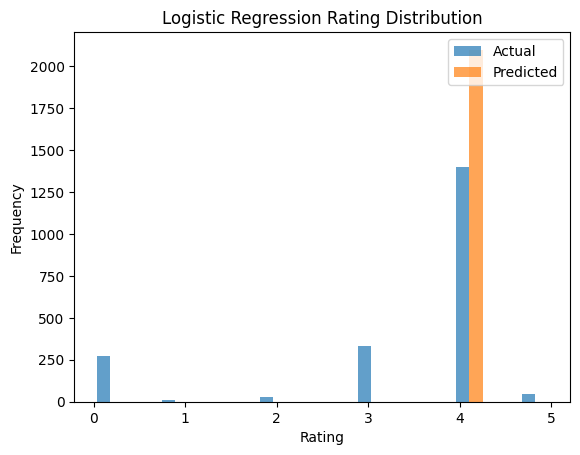

In [ ]:
plot_histogram(predictions_lr, "Logistic Regression Rating Distribution")

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = spark.sql("SELECT Category, Installs FROM play_apps")

In [ ]:
data.show()

+--------------+--------+
|      Category|Installs|
+--------------+--------+
|ART_AND_DESIGN|   10000|
|ART_AND_DESIGN|  500000|
|ART_AND_DESIGN| 5000000|
|ART_AND_DESIGN|50000000|
|ART_AND_DESIGN|  100000|
|ART_AND_DESIGN|   50000|
|ART_AND_DESIGN|   50000|
|ART_AND_DESIGN| 1000000|
|ART_AND_DESIGN| 1000000|
|ART_AND_DESIGN|   10000|
|ART_AND_DESIGN| 1000000|
|ART_AND_DESIGN| 1000000|
|ART_AND_DESIGN|10000000|
|ART_AND_DESIGN|  100000|
|ART_AND_DESIGN|  100000|
|ART_AND_DESIGN|    5000|
|ART_AND_DESIGN|  500000|
|ART_AND_DESIGN|   10000|
|ART_AND_DESIGN| 5000000|
|ART_AND_DESIGN|10000000|
+--------------+--------+
only showing top 20 rows



In [ ]:
data.describe().show()

+-------+--------+--------------------+
|summary|Category|            Installs|
+-------+--------+--------------------+
|  count|   10841|               10840|
|   mean|     1.9|1.5464338882564576E7|
| stddev|    null| 8.502936139546242E7|
|    min|     1.9|                   0|
|    max| WEATHER|          1000000000|
+-------+--------+--------------------+



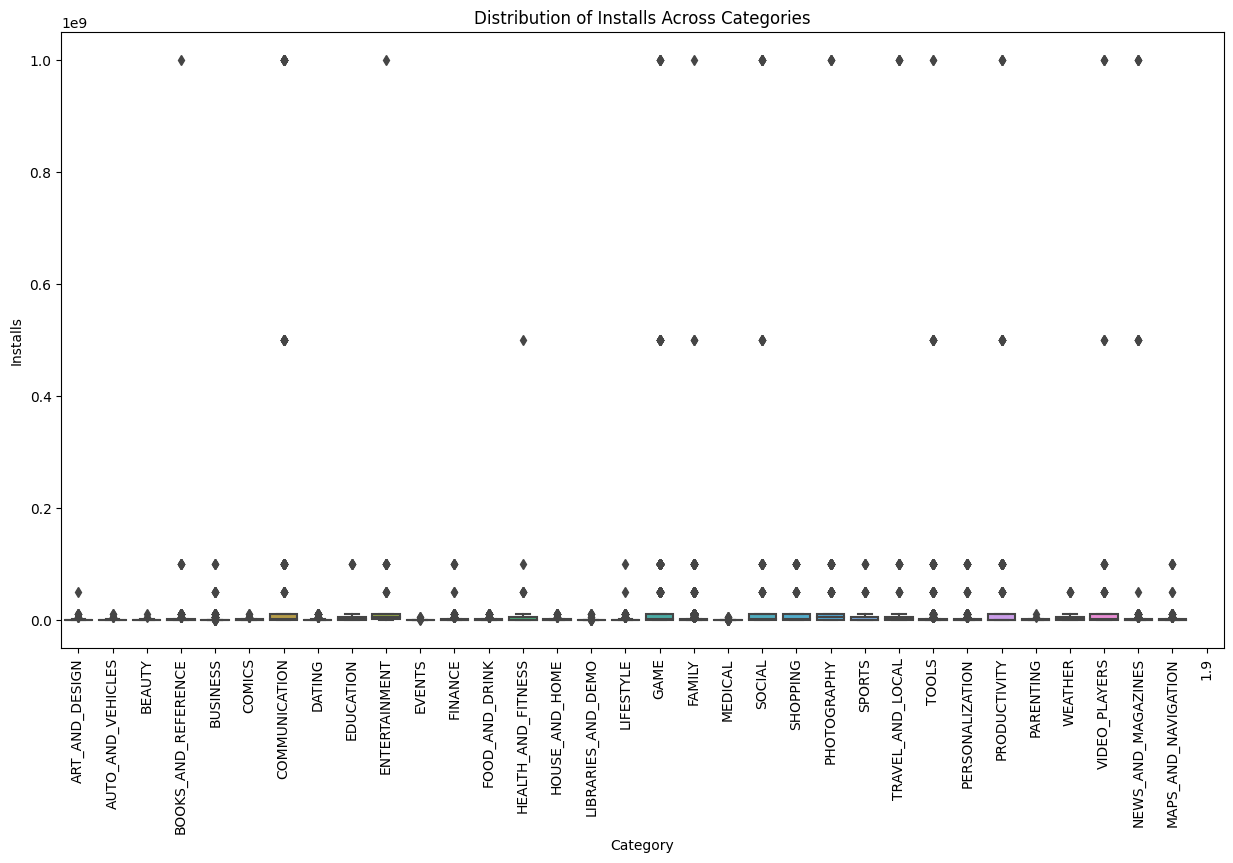

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Category', y='Installs', data=data.toPandas())
plt.title('Distribution of Installs Across Categories')
plt.xticks(rotation=90)
plt.show()

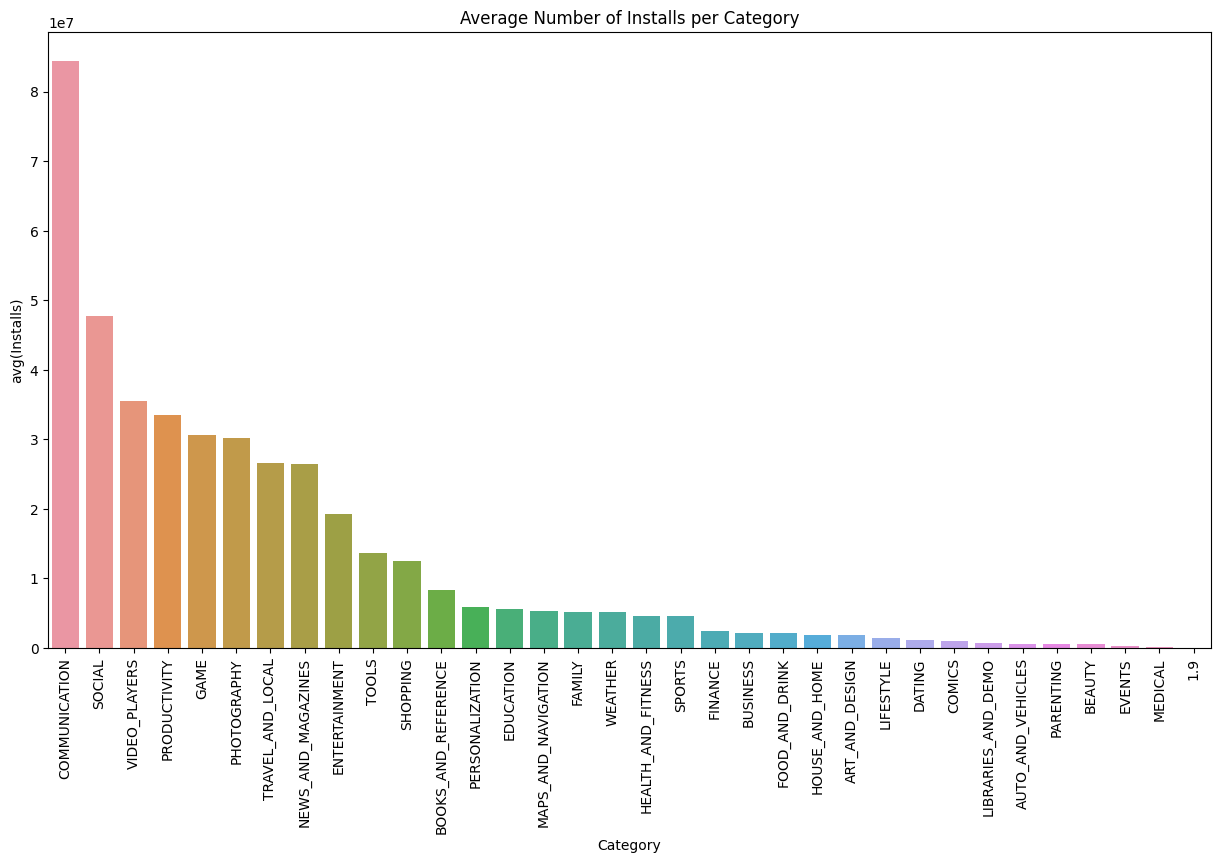

In [ ]:
avg_installs_per_category = data.groupBy('Category').avg('Installs').orderBy('avg(Installs)', ascending=False)
plt.figure(figsize=(15, 8))
sns.barplot(x='Category', y='avg(Installs)', data=avg_installs_per_category.toPandas())
plt.title('Average Number of Installs per Category')
plt.xticks(rotation=90)
plt.show()

In [ ]:
data = spark.sql("SELECT Category, Rating, Reviews FROM play_apps")

In [ ]:
data.show()

+--------------+------+-------+
|      Category|Rating|Reviews|
+--------------+------+-------+
|ART_AND_DESIGN|     4|    159|
|ART_AND_DESIGN|     3|    967|
|ART_AND_DESIGN|     4|  87510|
|ART_AND_DESIGN|     4| 215644|
|ART_AND_DESIGN|     4|    967|
|ART_AND_DESIGN|     4|    167|
|ART_AND_DESIGN|     3|    178|
|ART_AND_DESIGN|     4|  36815|
|ART_AND_DESIGN|     4|  13791|
|ART_AND_DESIGN|     4|    121|
|ART_AND_DESIGN|     4|  13880|
|ART_AND_DESIGN|     4|   8788|
|ART_AND_DESIGN|     4|  44829|
|ART_AND_DESIGN|     4|   4326|
|ART_AND_DESIGN|     4|   1518|
|ART_AND_DESIGN|     3|     55|
|ART_AND_DESIGN|     4|   3632|
|ART_AND_DESIGN|     4|     27|
|ART_AND_DESIGN|     4| 194216|
|ART_AND_DESIGN|     4| 224399|
+--------------+------+-------+
only showing top 20 rows



In [ ]:
data.describe().show()

+-------+--------+-----------------+------------------+
|summary|Category|           Rating|           Reviews|
+-------+--------+-----------------+------------------+
|  count|   10841|            10841|             10840|
|   mean|     1.9|3.266857300986994|444152.89603321033|
| stddev|    null|1.404886760818712| 2927760.603885666|
|    min|     1.9|                0|                 0|
|    max| WEATHER|               19|          78158306|
+-------+--------+-----------------+------------------+



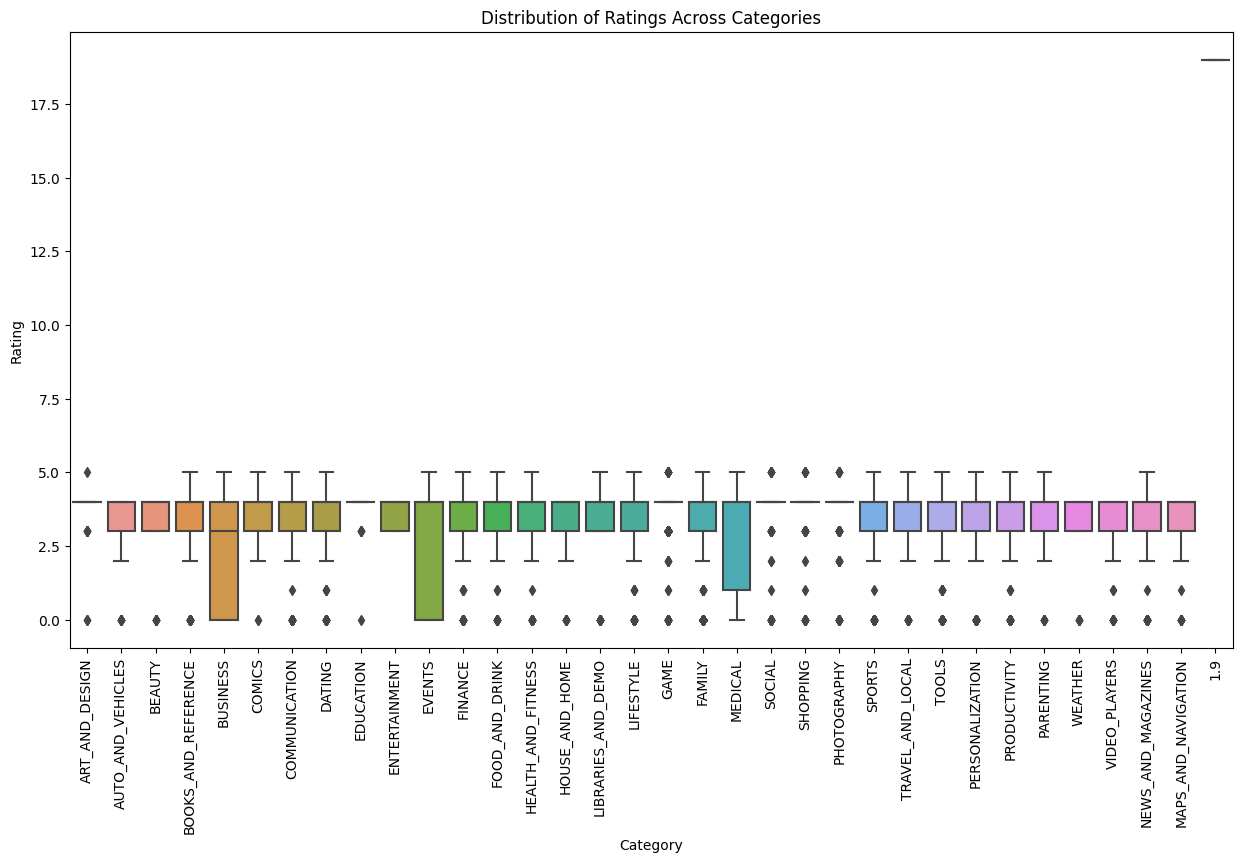

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Category', y='Rating', data=data.toPandas())
plt.title('Distribution of Ratings Across Categories')
plt.xticks(rotation=90)
plt.show()

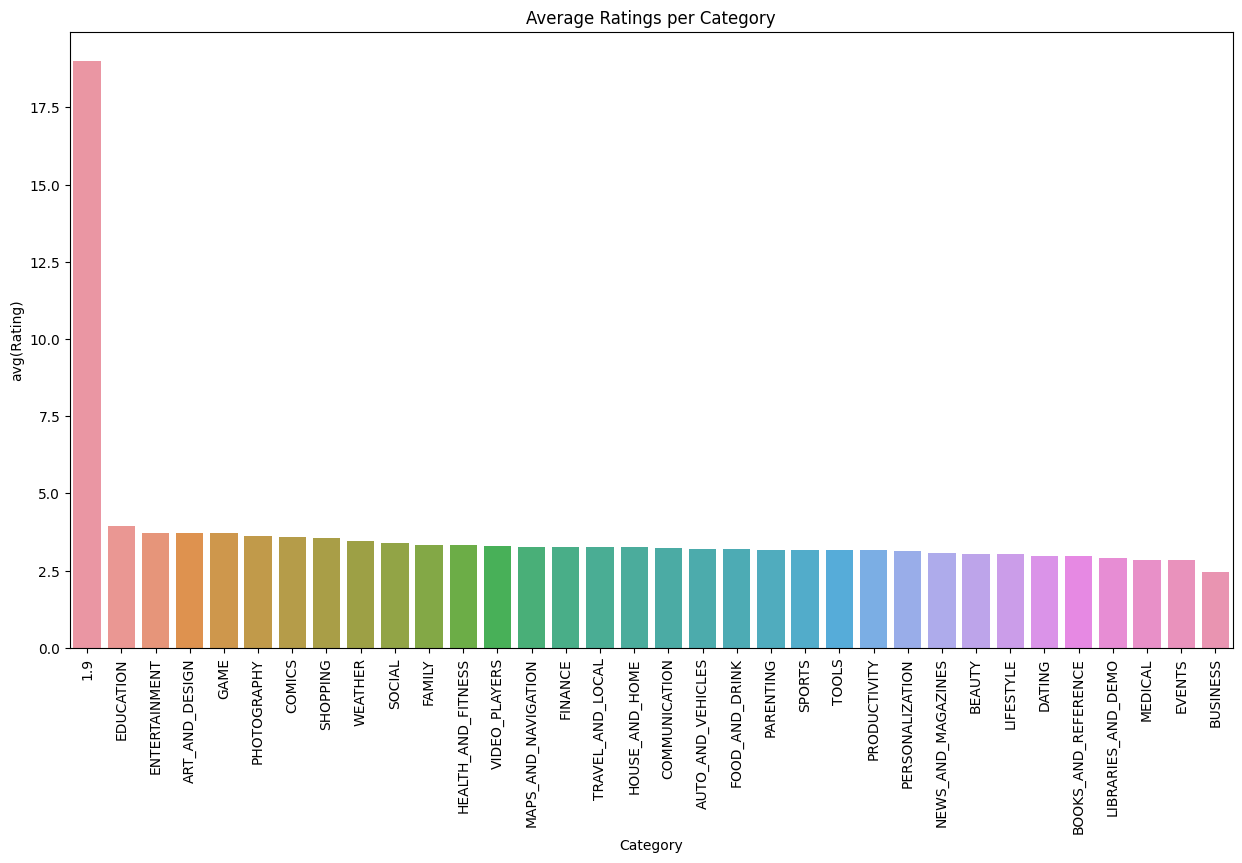

In [ ]:
avg_ratings_per_category = data.groupBy('Category').avg('Rating').orderBy('avg(Rating)', ascending=False)
plt.figure(figsize=(15, 8))
sns.barplot(x='Category', y='avg(Rating)', data=avg_ratings_per_category.toPandas())
plt.title('Average Ratings per Category')
plt.xticks(rotation=90)
plt.show()

In [ ]:
data = spark.sql("SELECT Category, Rating, Reviews, Installs FROM play_apps")

In [ ]:
data.show()

+--------------+------+-------+--------+
|      Category|Rating|Reviews|Installs|
+--------------+------+-------+--------+
|ART_AND_DESIGN|     4|    159|   10000|
|ART_AND_DESIGN|     3|    967|  500000|
|ART_AND_DESIGN|     4|  87510| 5000000|
|ART_AND_DESIGN|     4| 215644|50000000|
|ART_AND_DESIGN|     4|    967|  100000|
|ART_AND_DESIGN|     4|    167|   50000|
|ART_AND_DESIGN|     3|    178|   50000|
|ART_AND_DESIGN|     4|  36815| 1000000|
|ART_AND_DESIGN|     4|  13791| 1000000|
|ART_AND_DESIGN|     4|    121|   10000|
|ART_AND_DESIGN|     4|  13880| 1000000|
|ART_AND_DESIGN|     4|   8788| 1000000|
|ART_AND_DESIGN|     4|  44829|10000000|
|ART_AND_DESIGN|     4|   4326|  100000|
|ART_AND_DESIGN|     4|   1518|  100000|
|ART_AND_DESIGN|     3|     55|    5000|
|ART_AND_DESIGN|     4|   3632|  500000|
|ART_AND_DESIGN|     4|     27|   10000|
|ART_AND_DESIGN|     4| 194216| 5000000|
|ART_AND_DESIGN|     4| 224399|10000000|
+--------------+------+-------+--------+
only showing top

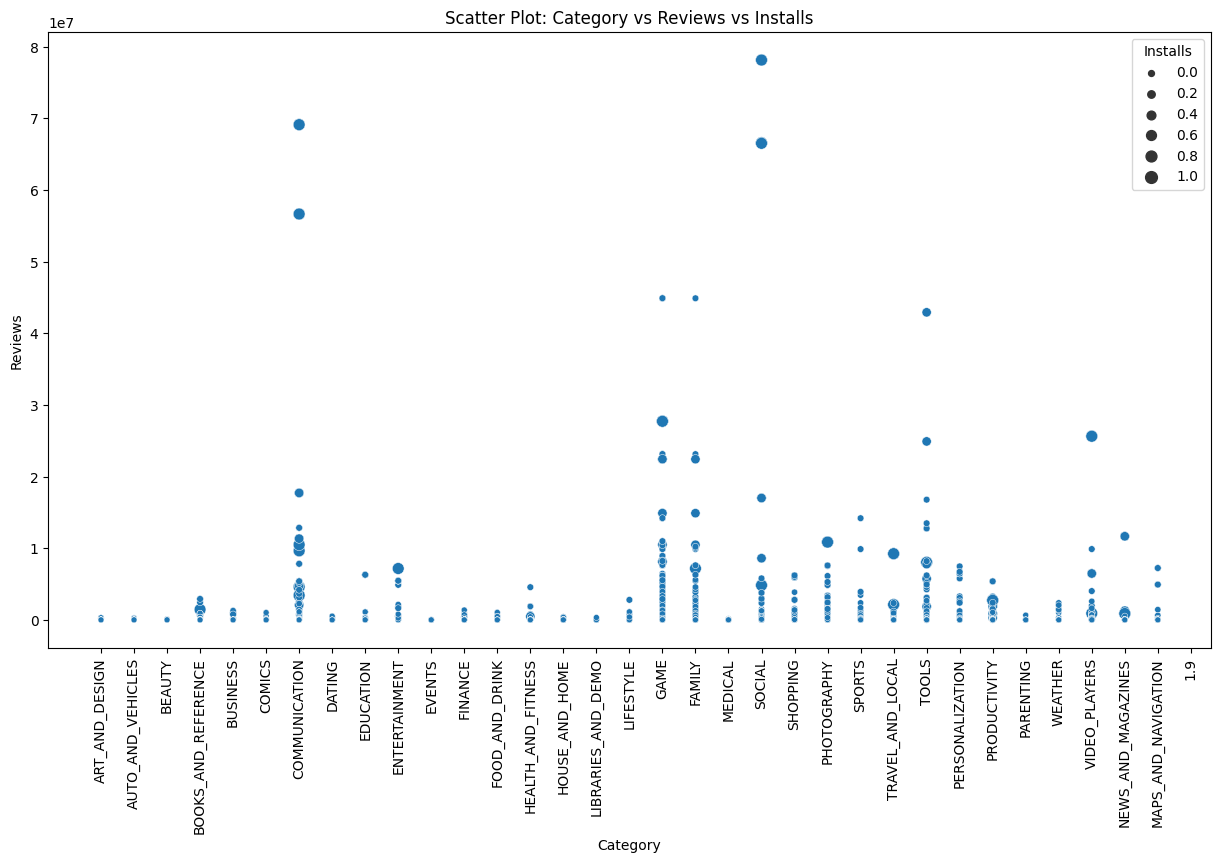

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='Category', y='Reviews', size='Installs', data=data.toPandas(), palette='viridis')
plt.title('Scatter Plot: Category vs Reviews vs Installs')
plt.xticks(rotation=90)
plt.show()

In [ ]:
data = spark.sql("SELECT Category, Rating, Reviews, Installs FROM play_apps")

In [ ]:
data.show()

+--------------+------+-------+--------+
|      Category|Rating|Reviews|Installs|
+--------------+------+-------+--------+
|ART_AND_DESIGN|     4|    159|   10000|
|ART_AND_DESIGN|     3|    967|  500000|
|ART_AND_DESIGN|     4|  87510| 5000000|
|ART_AND_DESIGN|     4| 215644|50000000|
|ART_AND_DESIGN|     4|    967|  100000|
|ART_AND_DESIGN|     4|    167|   50000|
|ART_AND_DESIGN|     3|    178|   50000|
|ART_AND_DESIGN|     4|  36815| 1000000|
|ART_AND_DESIGN|     4|  13791| 1000000|
|ART_AND_DESIGN|     4|    121|   10000|
|ART_AND_DESIGN|     4|  13880| 1000000|
|ART_AND_DESIGN|     4|   8788| 1000000|
|ART_AND_DESIGN|     4|  44829|10000000|
|ART_AND_DESIGN|     4|   4326|  100000|
|ART_AND_DESIGN|     4|   1518|  100000|
|ART_AND_DESIGN|     3|     55|    5000|
|ART_AND_DESIGN|     4|   3632|  500000|
|ART_AND_DESIGN|     4|     27|   10000|
|ART_AND_DESIGN|     4| 194216| 5000000|
|ART_AND_DESIGN|     4| 224399|10000000|
+--------------+------+-------+--------+
only showing top

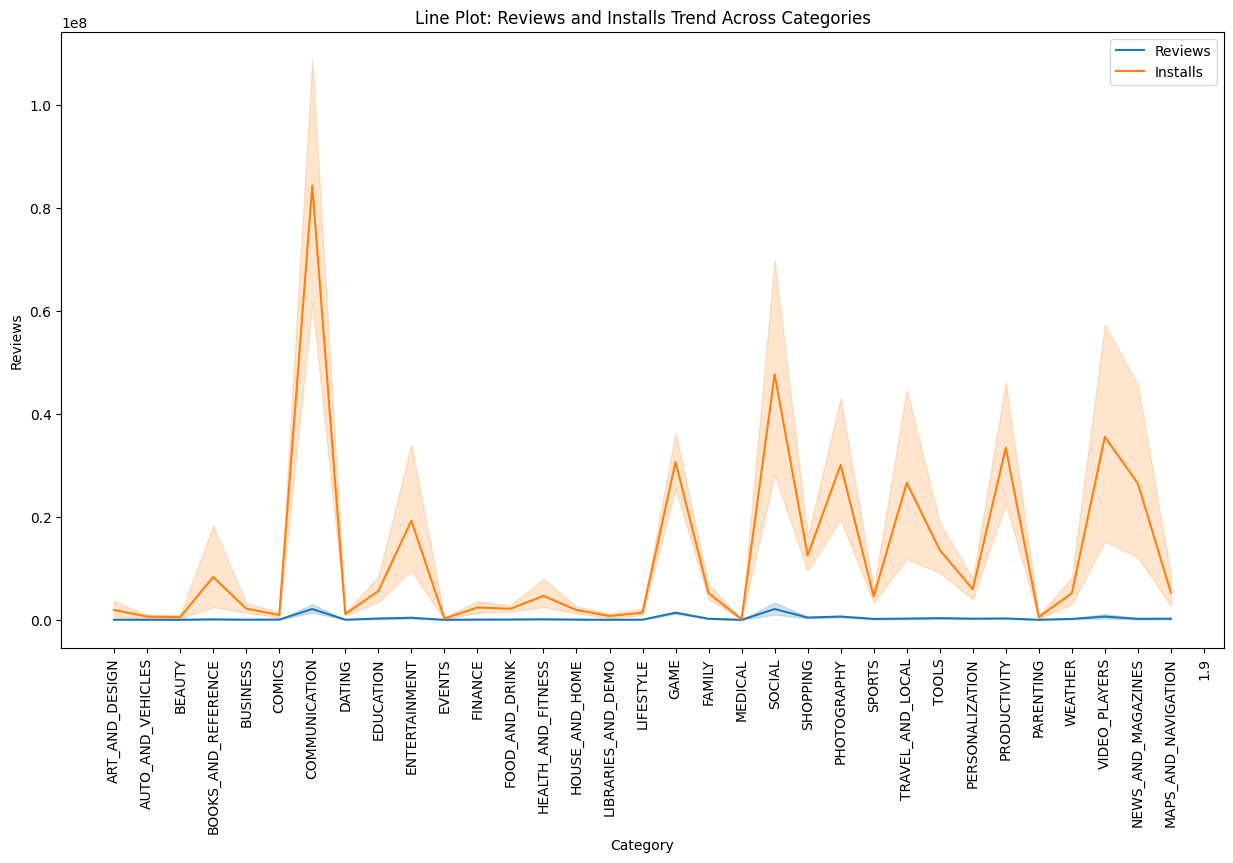

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Category', y='Reviews', data=data.toPandas(), label='Reviews')
sns.lineplot(x='Category', y='Installs', data=data.toPandas(), label='Installs')
plt.title('Line Plot: Reviews and Installs Trend Across Categories')
plt.xticks(rotation=90)
plt.show()

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
data = spark.sql("SELECT Installs, Price FROM play_apps")

In [ ]:
data.show(5)

+--------+-----+
|Installs|Price|
+--------+-----+
|   10000|    0|
|  500000|    0|
| 5000000|    0|
|50000000|    0|
|  100000|    0|
+--------+-----+
only showing top 5 rows



In [ ]:
data = data.dropna(subset=['Installs', 'Price'])

In [ ]:
assembler = VectorAssembler(inputCols=['Price'], outputCol='features')

In [ ]:
lr = LinearRegression(featuresCol='features', labelCol='Installs')

In [ ]:
pipeline = Pipeline(stages=[assembler, lr])

In [ ]:
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

In [ ]:
model = pipeline.fit(train_data)

In [ ]:
predictions = model.transform(test_data)

In [ ]:
evaluator = RegressionEvaluator(labelCol='Installs', predictionCol='prediction', metricName='rmse')
rmse = evaluator.evaluate(predictions)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 97186773.89935254


In [ ]:
predictions.select('Installs', 'prediction').show(10)

+--------+--------------------+
|Installs|          prediction|
+--------+--------------------+
|       0|1.4807196594312701E7|
|       0|1.4749678343665013E7|
|       0|1.4634641842369635E7|
|       0|  -7854994.160876676|
|       1|1.4807196594312701E7|
|       1|1.4807196594312701E7|
|       1|1.4807196594312701E7|
|       1|1.4807196594312701E7|
|       1|1.4807196594312701E7|
|       1|1.4807196594312701E7|
+--------+--------------------+
only showing top 10 rows



In [ ]:
predictions_pd = predictions.select('Price', 'Installs', 'prediction').toPandas()

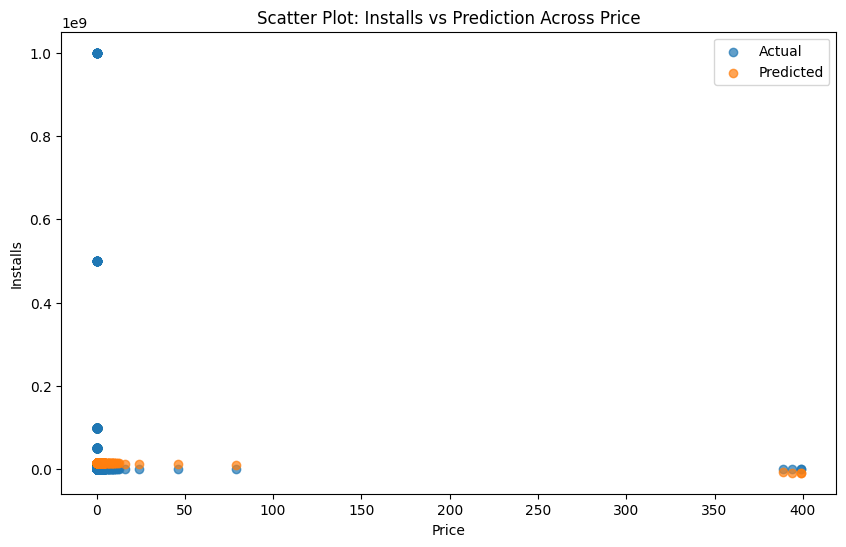

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions_pd['Price'], predictions_pd['Installs'], label='Actual', alpha=0.7)
plt.scatter(predictions_pd['Price'], predictions_pd['prediction'], label='Predicted', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Installs')
plt.title('Scatter Plot: Installs vs Prediction Across Price')
plt.legend()
plt.show()

In [ ]:
data = spark.sql("SELECT Reviews, Installs FROM play_apps")

In [ ]:
data.show()

+-------+--------+
|Reviews|Installs|
+-------+--------+
|    159|   10000|
|    967|  500000|
|  87510| 5000000|
| 215644|50000000|
|    967|  100000|
|    167|   50000|
|    178|   50000|
|  36815| 1000000|
|  13791| 1000000|
|    121|   10000|
|  13880| 1000000|
|   8788| 1000000|
|  44829|10000000|
|   4326|  100000|
|   1518|  100000|
|     55|    5000|
|   3632|  500000|
|     27|   10000|
| 194216| 5000000|
| 224399|10000000|
+-------+--------+
only showing top 20 rows



In [ ]:
data = data.dropna(subset=['Reviews', 'Installs'])

In [ ]:
assembler = VectorAssembler(inputCols=['Reviews'], outputCol='features')

In [ ]:
lr = LinearRegression(featuresCol='features', labelCol='Installs')

In [ ]:
pipeline = Pipeline(stages=[assembler, lr])

In [ ]:
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

In [ ]:
model = pipeline.fit(train_data)

In [ ]:
predictions = model.transform(test_data)

In [ ]:
evaluator = RegressionEvaluator(labelCol='Installs', predictionCol='prediction', metricName='rmse')
rmse = evaluator.evaluate(predictions)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 69303747.12977347


In [ ]:
predictions.select('Installs', 'prediction').show()

+--------+-----------------+
|Installs|       prediction|
+--------+-----------------+
|       0|7168096.334173296|
|       0|7168096.334173296|
|       0|7168096.334173296|
|       0|7168096.334173296|
|       1|7168096.334173296|
|       1|7168096.334173296|
|       1|7168096.334173296|
|       1|7168096.334173296|
|       1|7168096.334173296|
|       1|7168096.334173296|
|       1|7168096.334173296|
|       1|7168096.334173296|
|       1|7168096.334173296|
|       1|7168096.334173296|
|       1|7168096.334173296|
|       1|7168096.334173296|
|       5|7168096.334173296|
|       5|7168096.334173296|
|       5|7168096.334173296|
|       5|7168096.334173296|
+--------+-----------------+
only showing top 20 rows



In [ ]:
predictions_pd = predictions.select('Reviews', 'Installs', 'prediction').toPandas()

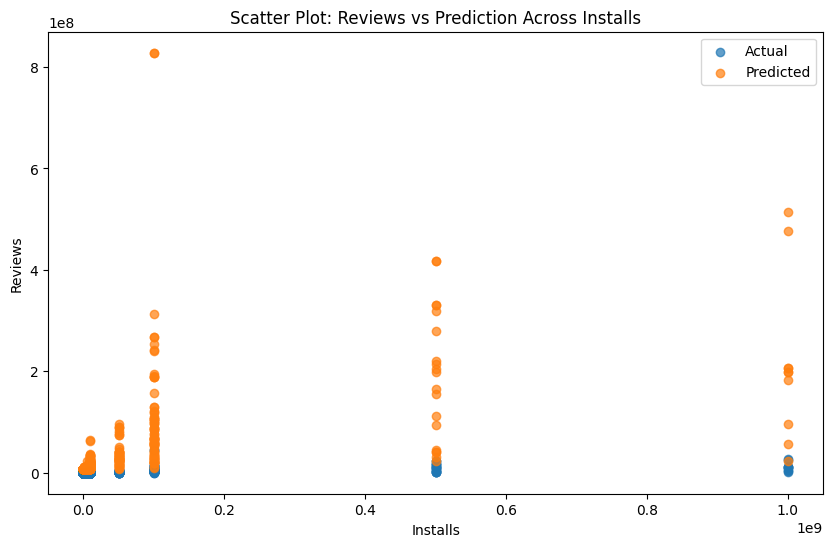

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions_pd['Installs'], predictions_pd['Reviews'], label='Actual', alpha=0.7)
plt.scatter(predictions_pd['Installs'], predictions_pd['prediction'], label='Predicted', alpha=0.7)
plt.xlabel('Installs')
plt.ylabel('Reviews')
plt.title('Scatter Plot: Reviews vs Prediction Across Installs')
plt.legend()
plt.show()